In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
import matplotlib.pyplot as plt

def show_img(data):
    fig,axes = plt.subplots(4,4)
    fig.set_size_inches(6,6)
    nrows = len(axes[0])
    ncolumns = len(axes[1])
    for row_index in range(nrows):
        for column_index in range(ncolumns):
            axes[row_index][column_index].imshow(data[row_index*nrows + column_index])

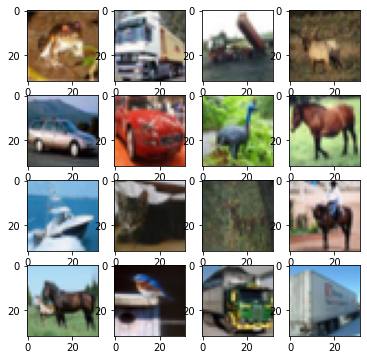

In [4]:
show_img(x_train)

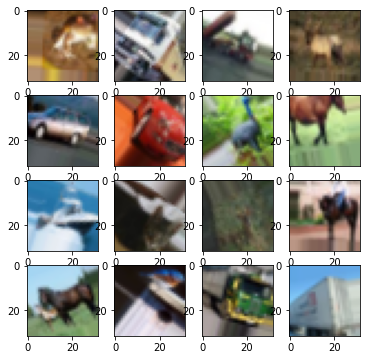

In [10]:
augumented_data = next(datagen.flow(x_train[:16],shuffle = False))
show_img(augumented_data.astype('int'))

In [4]:
def build_Conv2D(filters = [32,32,32]):
    model = keras.models.Sequential()
    model.add(Conv2D(filters[0],(3,3),activation = 'relu',input_shape = x_train.shape[1:]))
    for filter_num in filters[1:]:
        model.add(Conv2D(filter_num,(3,3),activation = 'relu'))
        model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(units = 256,activation = 'relu'))
    model.add(Dropout(.25))
    model.add(Dense(units = 10,activation = 'softmax'))
    return model

In [6]:
datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = .2,
                            height_shift_range = .2,
                            horizontal_flip = True)


In [5]:
model = build_Conv2D()
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = keras.optimizers.RMSprop())
model.fit(x_train,y_train,
         epochs = 10,
         batch_size = 128,
         shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 15s 303us/step - loss: 2.1980 - accuracy: 0.3176
Epoch 2/10
50000/50000 [==============================] - 13s 263us/step - loss: 1.3823 - accuracy: 0.5180
Epoch 3/10
50000/50000 [==============================] - 13s 265us/step - loss: 1.1559 - accuracy: 0.6007
Epoch 4/10
50000/50000 [==============================] - 13s 264us/step - loss: 1.0118 - accuracy: 0.6510
Epoch 5/10
50000/50000 [==============================] - 13s 266us/step - loss: 0.9093 - accuracy: 0.6870
Epoch 6/10
50000/50000 [==============================] - 13s 269us/step - loss: 0.8425 - accuracy: 0.7110
Epoch 7/10
50000/50000 [==============================] - 13s 267us/step - loss: 0.7790 - accuracy: 0.7335
Epoch 8/10
50000/50000 [==============================] - 13s 268us/step - loss: 0.7391 - accuracy: 0.7458
Epoch 9/10
50000/50000 [==============================] - 13s 268us/step - loss: 0.6876 - accuracy: 0.7638
Epoch 10/10
50000/50000 [============

In [7]:

model.fit_generator(datagen.flow(x_train,y_train,batch_size = 32),
                   steps_per_epoch = x_train.shape[0] / 32,
                    epochs = 10,
                   validation_data = (x_test,y_test))

Epoch 1/10
1563/1562 [==============================] - 41s 26ms/step - loss: 1.7050 - accuracy: 0.4020 - val_loss: 1.3279 - val_accuracy: 0.5424
Epoch 2/10
1563/1562 [==============================] - 40s 25ms/step - loss: 1.6752 - accuracy: 0.4117 - val_loss: 1.4575 - val_accuracy: 0.5002
Epoch 3/10
1563/1562 [==============================] - 40s 26ms/step - loss: 1.6658 - accuracy: 0.4180 - val_loss: 1.4148 - val_accuracy: 0.5180
Epoch 4/10
1563/1562 [==============================] - 40s 25ms/step - loss: 1.6768 - accuracy: 0.4101 - val_loss: 1.4574 - val_accuracy: 0.4909
Epoch 5/10
1563/1562 [==============================] - 39s 25ms/step - loss: 1.6866 - accuracy: 0.4081 - val_loss: 1.3858 - val_accuracy: 0.5235
Epoch 6/10
1563/1562 [==============================] - 41s 26ms/step - loss: 1.7064 - accuracy: 0.4018 - val_loss: 1.5580 - val_accuracy: 0.4752
Epoch 7/10
1563/1562 [==============================] - 41s 26ms/step - loss: 1.7031 - accuracy: 0.4057 - val_loss: 1.4322 -

In [8]:
model.fit(x_train,y_train,
         epochs = 10,
         batch_size = 128,
         shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 14s 275us/step - loss: 1.3638 - accuracy: 0.5261
Epoch 2/10
50000/50000 [==============================] - 13s 267us/step - loss: 1.2815 - accuracy: 0.5590
Epoch 3/10
50000/50000 [==============================] - 14s 272us/step - loss: 1.2346 - accuracy: 0.5772
Epoch 4/10
50000/50000 [==============================] - 13s 265us/step - loss: 1.1996 - accuracy: 0.5898
Epoch 5/10
50000/50000 [==============================] - 13s 265us/step - loss: 1.1747 - accuracy: 0.5981
Epoch 6/10
50000/50000 [==============================] - 13s 270us/step - loss: 1.1600 - accuracy: 0.6031
Epoch 7/10
50000/50000 [==============================] - 14s 276us/step - loss: 1.1239 - accuracy: 0.6138
Epoch 8/10
50000/50000 [==============================] - 13s 266us/step - loss: 1.1212 - accuracy: 0.6152
Epoch 9/10
50000/50000 [==============================] - 13s 264us/step - loss: 1.1067 - accuracy: 0.6245
Epoch 10/10
50000/50000 [============